In [ ]:
# Install TensorFlow (if not already installed)
!pip install tensorflow


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload the dataset


Saving lungtumor.zip to lungtumor.zip


In [ ]:
import zipfile
with zipfile.ZipFile('/content/lungtumor.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset/')



In [ ]:
train_dir = '/content/drive/MyDrive/train'
val_dir = '/content/drive/MyDrive/val'
test_dir = '/content/drive/MyDrive/test'


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerators with data augmentation for training and no augmentation for validation and testing
train_datagen = ImageDataGenerator(
    rescale=1./255,              # Normalize pixel values to [0, 1]
    rotation_range=40,           # Randomly rotate images
    width_shift_range=0.2,       # Randomly shift images horizontally
    height_shift_range=0.2,      # Randomly shift images vertically
    shear_range=0.2,             # Shear images randomly
    zoom_range=0.2,              # Zoom in/out randomly
    horizontal_flip=True,        # Randomly flip images horizontally
    fill_mode='nearest'          # Fill any empty areas after transformations
)

val_test_datagen = ImageDataGenerator(rescale=1./255)  # No augmentation for validation and test

# Flow images from the directories into the model
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resize all images to 224x224
    batch_size=32,
    class_mode='binary'      # Binary classification (cancerous or non-cancerous)
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 606 images belonging to 1 classes.
Found 99 images belonging to 1 classes.
Found 202 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# First convolutional block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from 2D to 1D
model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer to reduce overfitting

model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,  # Set the number of epochs
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 208s 8s/step - accuracy: 0.8947 - loss: 0.1308 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/20
 1/18 ━━━━━━━━━━━━━━━━━━━━ 1:15 4s/step - accuracy: 1.0000 - loss: 0.0000e+00

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 215ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 143s 5s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 95s 5s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 137s 5s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 136s 5s/step - accuracy: 1.00

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Accuracy: {test_acc:.4f}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 41s 8s/step - accuracy: 0.7839 - loss: 188.4532
Test Accuracy: 0.7812


In [ ]:
import matplotlib.pyplot as plt


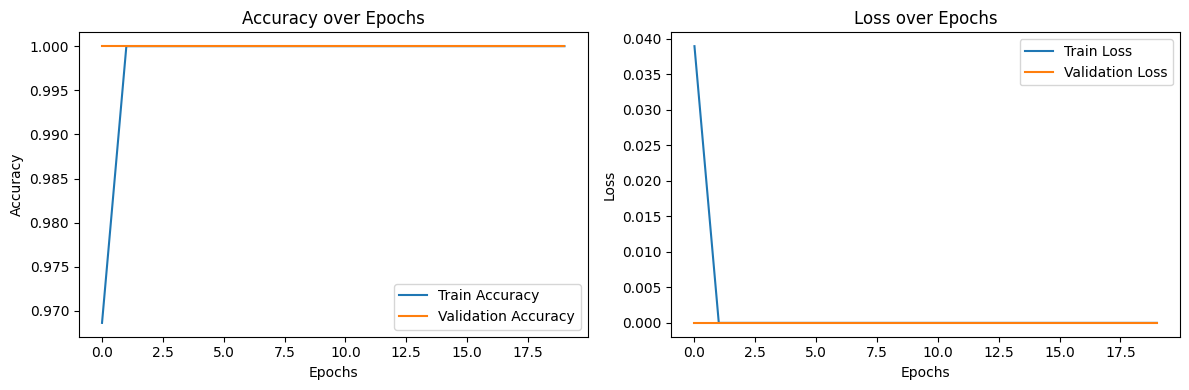

In [ ]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np


7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step


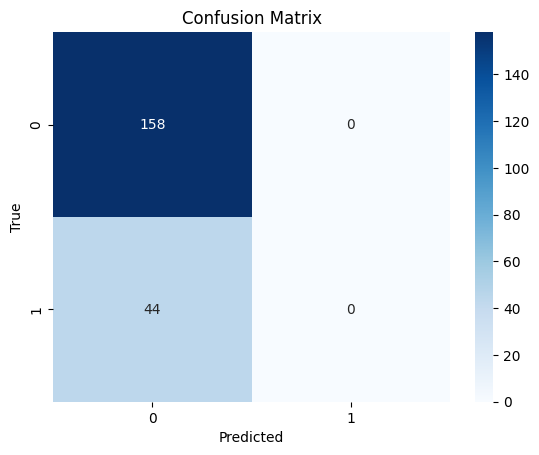

               precision    recall  f1-score   support

Non-cancerous       0.78      1.00      0.88       158
    Cancerous       0.00      0.00      0.00        44

     accuracy                           0.78       202
    macro avg       0.39      0.50      0.44       202
 weighted avg       0.61      0.78      0.69       202



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Predict the test set without specifying steps to cover the full test set
test_preds = model.predict(test_generator)
test_preds = np.round(test_preds)  # Round predictions to 0 or 1

# Get true labels
true_labels = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(true_labels, test_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print(classification_report(true_labels, test_preds, target_names=['Non-cancerous', 'Cancerous']))


In [ ]:
model.save('/content/drive/MyDrive/lung_tumor_prediction_model.h5')  # Save to Google Drive


In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np

# Upload an image from your local machine
uploaded = files.upload()

# Get the name of the uploaded image
image_name = next(iter(uploaded))  # Get the first uploaded file name

# Load the image and preprocess it
img = image.load_img(image_name, target_size=(224, 224))  # Resize to match model input size
img_array = image.img_to_array(img)  # Convert image to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (since the model expects a batch of images)
img_array = img_array / 255.0  # Normalize the image (same as training)



Saving large.cell.carcinoma2.png to large.cell.carcinoma2.png


In [ ]:
# Make a prediction on the uploaded image
prediction = model.predict(img_array)

# If the model predicts 1, it's a tumor (cancerous), if 0, it's non-cancerous
if prediction[0] > 0.5:
    print("The image contains a tumor (Cancerous).")
else:
    print("The image does not contain a tumor (Non-cancerous).")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
The image does not contain a tumor (Non-cancerous).


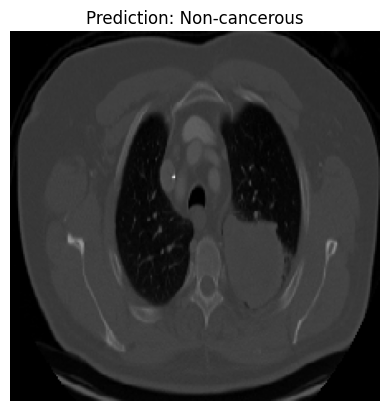

In [ ]:
import matplotlib.pyplot as plt

# Display the uploaded image
plt.imshow(img)
plt.title(f"Prediction: {'Tumor (Cancerous)' if prediction[0] > 0.5 else 'Non-cancerous'}")
plt.axis('off')  # Hide axis
plt.show()
